# Bank Direct Marketing Campaign


 - A Portuguese Banking Institution lauched a new product (Term Deposit) and have decided to engage in a direct marketing campaign to access if its customers would subscribe to the product or not.
 

 - Problem Statement - To predict if the Bank Customers contacted through the marketing campaign will subscribe to the new product (term deposit)


In [1]:
#import python libraries for data manipulation and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import other libraries....
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


# Data Inspection

* Load the data set
* Within a markdown cell, give a description of the dataset:
    * what is the source of the data?
    * how many rows and columns?
    * does it have missing values?
    * any other significant details

## Data Description

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
  Portugal, October, 2011. EUROSIS.

4. Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2011].

   ## Input variables:
   
   # bank client data:
   
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
              "blue-collar","self-employed","retired","technician","services") 
              
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
   # related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
   10 - day: last contact day of the month (numeric)
   
   11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
   12 - duration: last contact duration, in seconds (numeric)
  
   # other attributes:
   
   13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   
   14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means   
              client was not previously contacted)
              
   15 - previous: number of contacts performed before this campaign and for this client (numeric)
   
   16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

   Output variable (desired target):
   17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None

In [2]:
# load the data
#the semi-colon is specified in separator because the data file uses semi-colons for delimiters

bank_cust = pd.read_csv(r'C:\Users\HP ELITEBOOK\Documents\10Alytics - Data Science\Python\bank.csv',sep=';', header=None)       
bank_cust.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [3]:
#set values in the first row as columns to the data frame

bank_cust.rename(columns = bank_cust.iloc[0],inplace=True)
bank_cust.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [4]:
#delete the first row 

bank_cust.drop(0,inplace=True)
bank_cust.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
bank_cust.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4517,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4519,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4521,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [6]:
#inspect the data

bank_cust.shape


(4521, 17)

In [7]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   object
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   object
 10  month      4521 non-null   object
 11  duration   4521 non-null   object
 12  campaign   4521 non-null   object
 13  pdays      4521 non-null   object
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: object(17)
memory usage: 600.6+ KB


In [8]:
bank_cust.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
bank_cust.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,67,12,3,4,2,2353,2,2,3,31,12,875,32,292,24,4,2
top,34,management,married,secondary,no,0,yes,no,cellular,20,may,123,1,-1,0,unknown,no
freq,231,969,2797,2306,4445,357,2559,3830,2896,257,1398,27,1734,3705,3705,3705,4000


  - The source of the data is a csv file
  
  - The data consists of 4521 rows and 17 columns
  
  - The data has no missing values
  
  - It is made up of both numerical and categorical data.
 

# Data Cleansing

In this markdown cell, mention the data cleaning steps you will take. Some of your steps may include
* Handling missing values (NaN)
* Replacing text
* Removing or deleting unnecessary records

In [10]:
# Converting numerical data from objects to Int64

bank_cust['age'] = bank_cust.age.astype('Int64')
bank_cust['balance'] = bank_cust.balance.astype('Int64')
bank_cust['day'] = bank_cust.day.astype('Int64')
bank_cust['duration'] = bank_cust.duration.astype('Int64')
bank_cust['campaign'] = bank_cust.campaign.astype('Int64')
bank_cust['pdays'] = bank_cust.pdays.astype('Int64')
bank_cust['previous'] = bank_cust.previous.astype('Int64')

In [11]:
# Replace header 'y' to subscribed 

bank_cust.rename(columns = {'y':'subscribed'}, inplace = True)
bank_cust.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [12]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         4521 non-null   Int64 
 1   job         4521 non-null   object
 2   marital     4521 non-null   object
 3   education   4521 non-null   object
 4   default     4521 non-null   object
 5   balance     4521 non-null   Int64 
 6   housing     4521 non-null   object
 7   loan        4521 non-null   object
 8   contact     4521 non-null   object
 9   day         4521 non-null   Int64 
 10  month       4521 non-null   object
 11  duration    4521 non-null   Int64 
 12  campaign    4521 non-null   Int64 
 13  pdays       4521 non-null   Int64 
 14  previous    4521 non-null   Int64 
 15  poutcome    4521 non-null   object
 16  subscribed  4521 non-null   object
dtypes: Int64(7), object(10)
memory usage: 631.5+ KB


In [13]:
bank_cust.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [14]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         4521 non-null   Int64 
 1   job         4521 non-null   object
 2   marital     4521 non-null   object
 3   education   4521 non-null   object
 4   default     4521 non-null   object
 5   balance     4521 non-null   Int64 
 6   housing     4521 non-null   object
 7   loan        4521 non-null   object
 8   contact     4521 non-null   object
 9   day         4521 non-null   Int64 
 10  month       4521 non-null   object
 11  duration    4521 non-null   Int64 
 12  campaign    4521 non-null   Int64 
 13  pdays       4521 non-null   Int64 
 14  previous    4521 non-null   Int64 
 15  poutcome    4521 non-null   object
 16  subscribed  4521 non-null   object
dtypes: Int64(7), object(10)
memory usage: 631.5+ KB


# Data Visualization

In this section, visualize import relationships in the data set.

## Univariate Analysis

Create charts where you plot only one variable (column) at a time. 

You can use simple charts like histograms and boxplots.

> For example, use a histogram to plot an age distribution column (if you have one).

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

In [15]:
#univariate analysis cells


bank_cust.job.value_counts()


management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

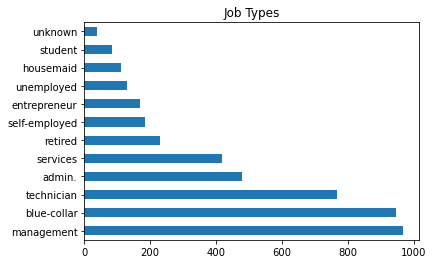

In [16]:
bank_cust.job.value_counts().plot.barh()
plt.title('Job Types')
plt.show()

 #### More customers having management, blue-collar job and technical jobs types were contacted during the campaign

In [17]:
#univariate analysis cells

bank_cust.subscribed.value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

#### Of the 4,521 customers involved in the campaign, 521 have subscribed to the term loan and 4,000 haven't subscribed

Text(0.5, 0, 'Subscribed')

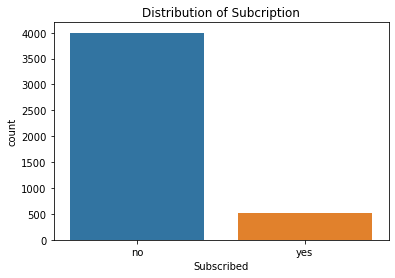

In [18]:
from matplotlib import pyplot as plt
sns.countplot(x=bank_cust['subscribed'])
plt.title('Distribution of Subcription')
plt.xlabel('Subscribed')


In [19]:
bank_cust.subscribed.value_counts(normalize=True)


no     0.88476
yes    0.11524
Name: subscribed, dtype: float64

#### 88% of the bank customers contacted haven't subscribed for the term loan while 12% have subscribed to the term loan

In [20]:
# Analysing the results from previous campaign exercise

bank_cust.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [21]:
bank_cust.poutcome.value_counts(normalize=True)

unknown    0.819509
failure    0.108383
other      0.043574
success    0.028534
Name: poutcome, dtype: float64

####  Only 3% sucess rate was recorded from previous campaign

Text(0.5, 0, 'Poutcome')

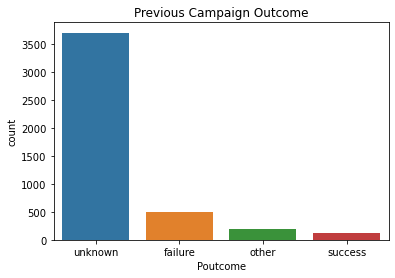

In [22]:
sns.countplot(x=bank_cust['poutcome'])
plt.title('Previous Campaign Outcome')
plt.xlabel('Poutcome')

#### From previous marketing campaign, only 129 was successful

<AxesSubplot:xlabel='duration', ylabel='Count'>

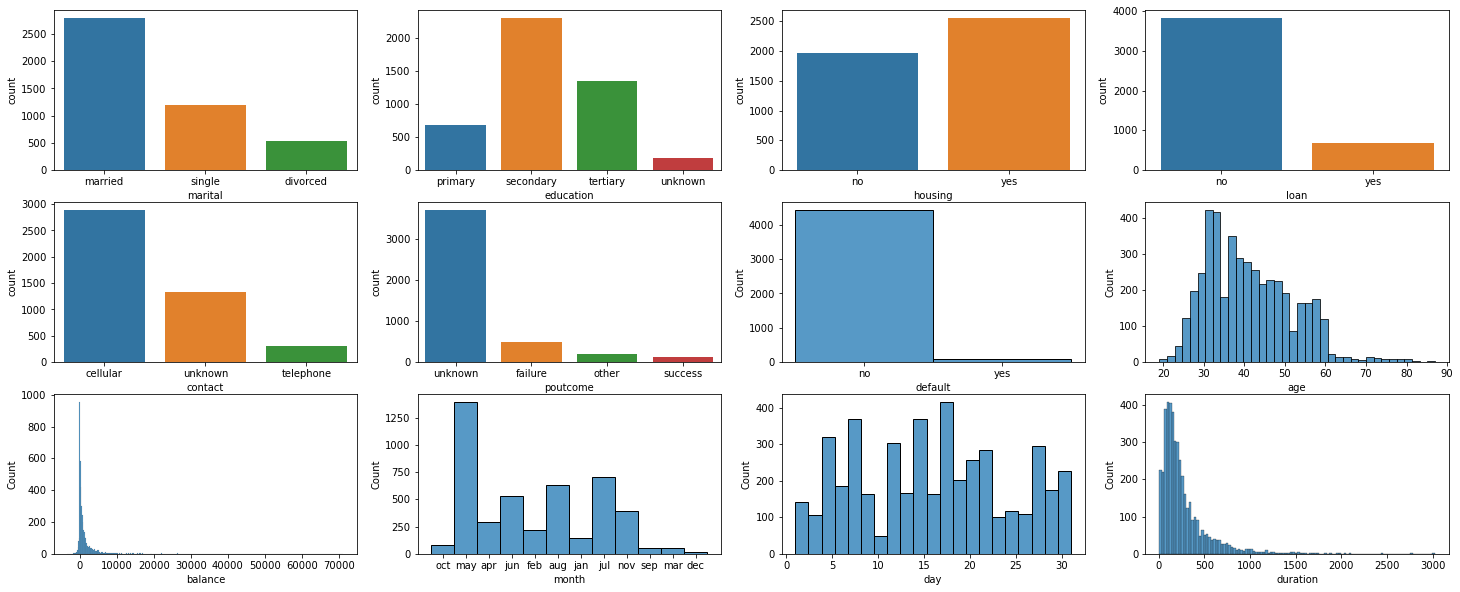

In [23]:
fig, axes = plt.subplots(3,4, figsize=(25,10))

# categorical variables
sns.countplot(x='marital', data=bank_cust, ax=axes[0,0])
sns.countplot(x='education', data=bank_cust, ax=axes[0,1])
sns.countplot(x='housing', data=bank_cust, ax=axes[0,2])
sns.countplot(x='loan', data=bank_cust, ax=axes[0,3])
sns.countplot(x='contact', data=bank_cust, ax=axes[1,0])
sns.countplot(x='poutcome', data=bank_cust, ax=axes[1,1])
sns.histplot(x='default', data=bank_cust, ax=axes[1,2])

# numerical data
sns.histplot(x='age', data=bank_cust, ax=axes[1,3])
sns.histplot(x='balance', data=bank_cust, ax=axes[2,0])
sns.histplot(x='month', data=bank_cust, ax=axes[2,1])
sns.histplot(x='day', data=bank_cust, ax=axes[2,2])
sns.histplot(x='duration', data=bank_cust, ax=axes[2,3])



  ### Summary of findings
 1. We had more married customers contacted than single and divorced.
 2. More customers have more secondary and tertiary education were contacted
 3. More customer have housing loans and no default in credit
 4. On the average more customers are contacted on the 18th day of the month, with May been the highest contact month
 5. The average bank balance of customers is about 2000 Euros
 6. From previous marketin campaign only about 129 was successful
 7. More customers were contacted via cellular than any other means
 

## Bivariate Analysis

Create charts where you plot only two variables at a time on a chart. 

You can use visuals like bar charts, boxplots, scatter plots and so on.

> You can plot variables like age against number of purchases, etc

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

Text(0.5, 0, 'Subscribed')

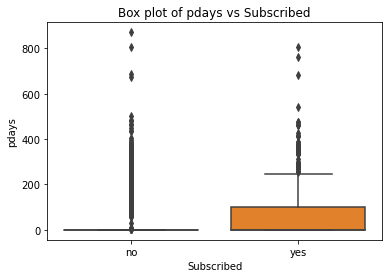

In [24]:
#bivariate analysis cells

sns.boxplot(y=bank_cust['pdays'], x=bank_cust['subscribed'])
plt.title('Box plot of pdays vs Subscribed')
plt.xlabel('Subscribed')

Text(0.5, 0, 'Subscribed')

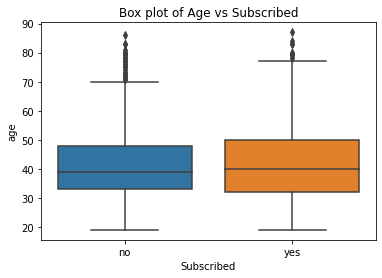

In [25]:
sns.boxplot(y=bank_cust['age'], x=bank_cust['subscribed'])
plt.title('Box plot of Age vs Subscribed')
plt.xlabel('Subscribed')

Text(0.5, 0, 'Subscribed')

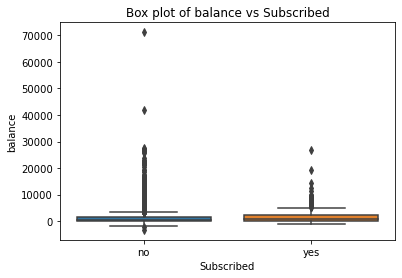

In [26]:
sns.boxplot(y=bank_cust['balance'], x=bank_cust['subscribed'])
plt.title('Box plot of balance vs Subscribed')
plt.xlabel('Subscribed')

Text(0.5, 0, 'Subscribed')

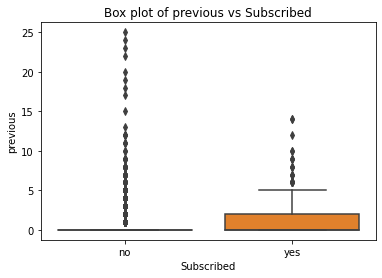

In [27]:
sns.boxplot(y=bank_cust['previous'], x=bank_cust['subscribed'])
plt.title('Box plot of previous vs Subscribed')
plt.xlabel('Subscribed')

Text(0.5, 0, 'Subscribed')

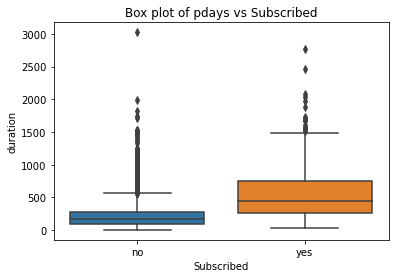

In [28]:
sns.boxplot(y=bank_cust['duration'], x=bank_cust['subscribed'])
plt.title('Box plot of pdays vs Subscribed')
plt.xlabel('Subscribed')

<AxesSubplot:xlabel='age', ylabel='campaign'>

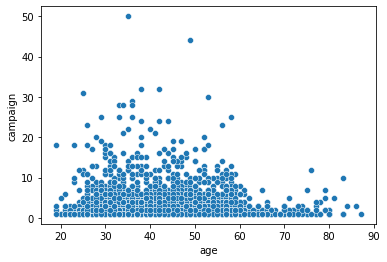

In [29]:
#bivariate analysis cells

sns.scatterplot(x=bank_cust['age'], y=bank_cust['campaign'])


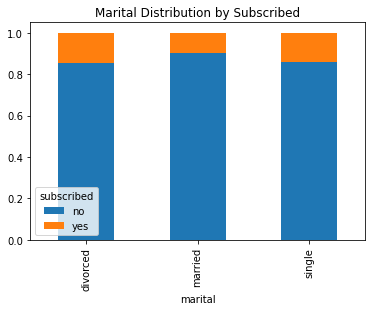

In [30]:
marital_subscribed_pivot = pd.crosstab(bank_cust.marital,bank_cust.subscribed,normalize='index')

marital_subscribed_pivot.plot.bar(stacked=True)

plt.title('Marital Distribution by Subscribed')
plt.show()

In [31]:
display(marital_subscribed_pivot)

subscribed,no,yes
marital,,
divorced,0.854167,0.145833
married,0.900965,0.099035
single,0.860368,0.139632


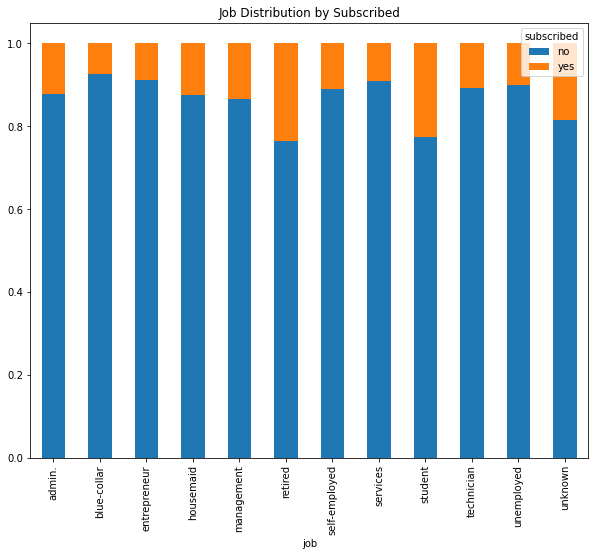

In [32]:
job_subscribed_pivot = pd.crosstab(bank_cust.job,bank_cust.subscribed,normalize='index')

#plot the data
job_subscribed_pivot.plot.bar(stacked=True, figsize=(10,8))

plt.title('Job Distribution by Subscribed')
plt.show()

## Multivariate Analysis

Create charts where you plot more than two variables at a time on a chart. 

You can use visuals like bar charts, scatter plots and so on.

> Explore how to use the `hue` parameter in `seaborn` chart types

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

<AxesSubplot:xlabel='marital', ylabel='age'>

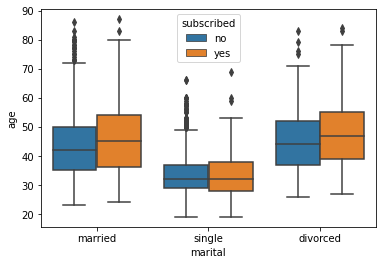

In [33]:
#multivariate analysis cells

sns.boxplot(x='marital', y='age', hue='subscribed', data=bank_cust)

<AxesSubplot:xlabel='month', ylabel='count'>

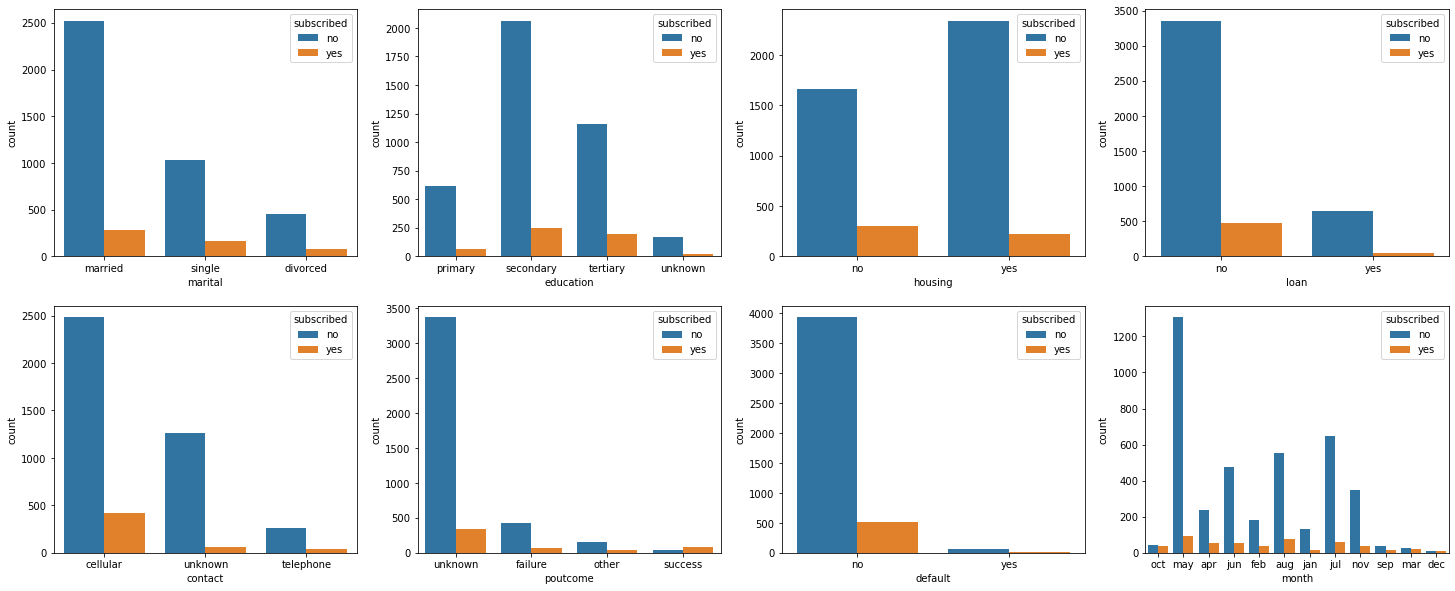

In [34]:
fig, axes = plt.subplots(2,4, figsize=(25,10))

# categorical variables
sns.countplot(x='marital', data=bank_cust, hue ='subscribed', ax=axes[0,0])
sns.countplot(x='education', data=bank_cust, hue ='subscribed', ax=axes[0,1])
sns.countplot(x='housing', data=bank_cust, hue ='subscribed', ax=axes[0,2])
sns.countplot(x='loan', data=bank_cust, hue ='subscribed', ax=axes[0,3])
sns.countplot(x='contact', data=bank_cust, hue ='subscribed', ax=axes[1,0])
sns.countplot(x='poutcome', data=bank_cust, hue ='subscribed', ax=axes[1,1])
sns.countplot(x='default', data=bank_cust, hue ='subscribed', ax=axes[1,2])
sns.countplot(x='month', data=bank_cust, hue ='subscribed', ax=axes[1,3])

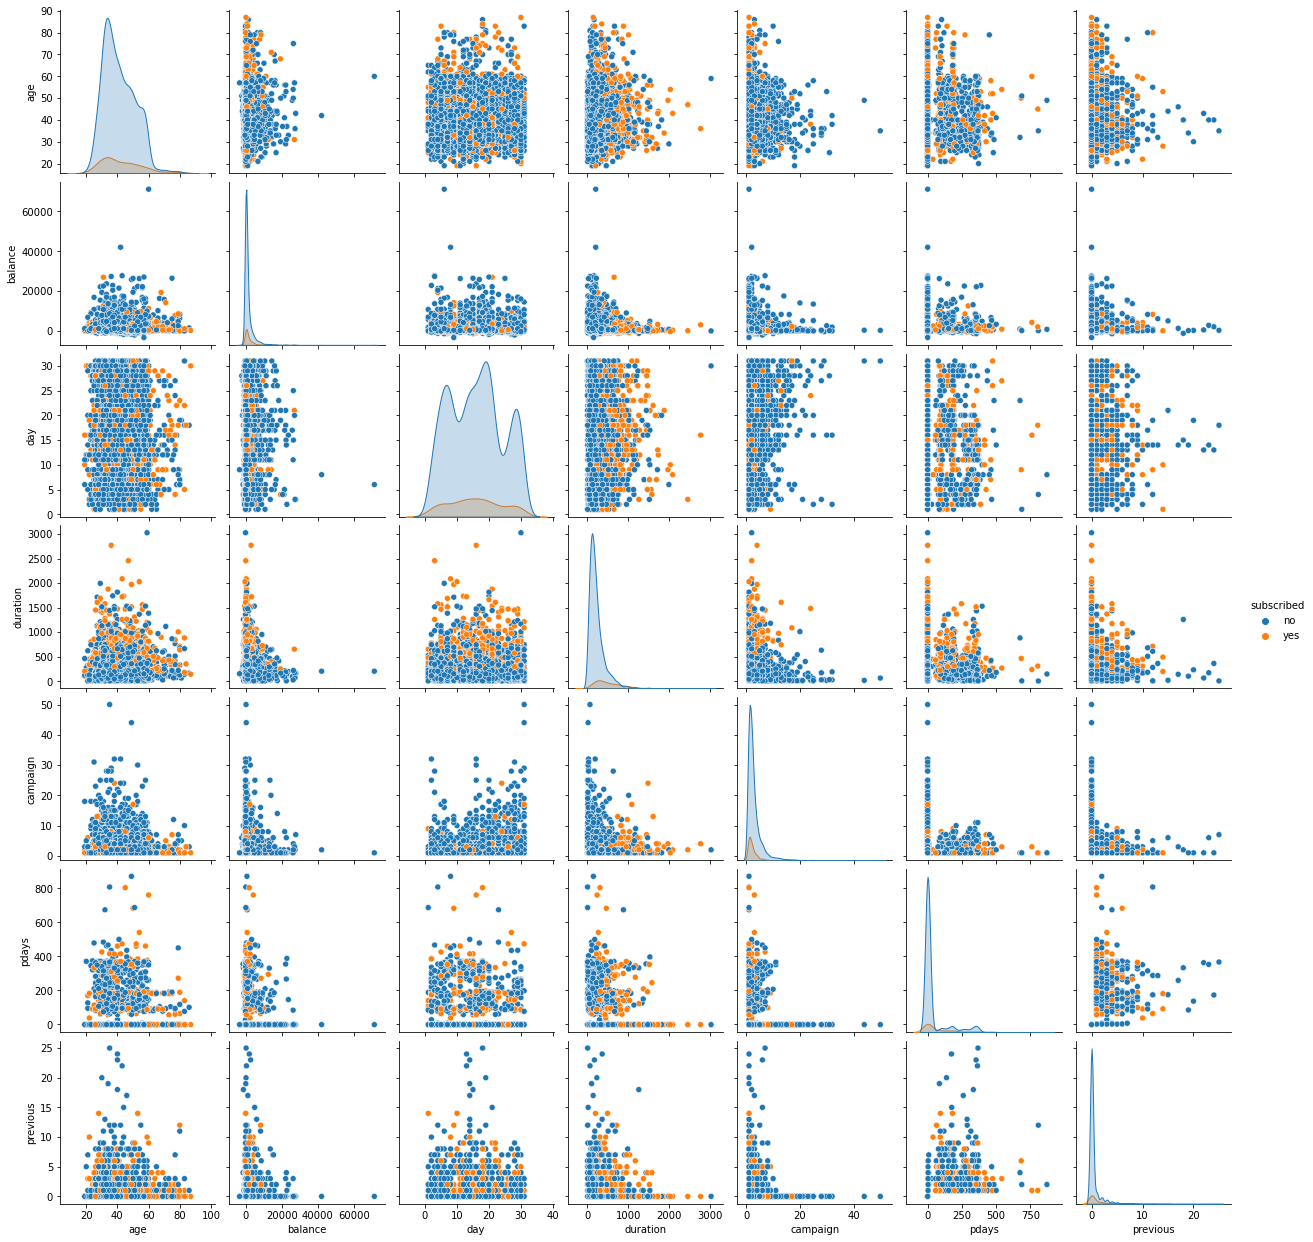

In [35]:
#multivariate analysis cells

sns.pairplot(bank_cust, hue='subscribed')      

<AxesSubplot:>

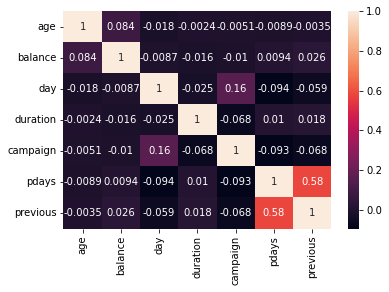

In [36]:
corel = bank_cust.corr()
sns.heatmap(corel,annot=True)

# Summary of Findings

In this markdown cell, summarize your list of findings.

1. Success rate is highest for student

2. Very few customerss are contacted who are defaulter,

3. As seen for default variable, less customers are contacted who have loans.

4. Our numerical features have very less correlation between them.

5. pdays and previous have higher correlation

6. More customers have more secondary and tertiary education were contacted with more sucess on the secondary education

# Modelling

In this section, you will train and evaluate your models


## Select Target

In [37]:
y = bank_cust.subscribed
y.head()

1    no
2    no
3    no
4    no
5    no
Name: subscribed, dtype: object

In [38]:
# converting our categorical target to numerical with label encoder 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

bank_cust['subscribed'] = le.fit_transform(bank_cust['subscribed'])
bank_cust

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,0
4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0
4519,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,0
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,0


In [39]:
#1. select categorical variables

categorical = ['job','marital','education','default','housing','loan', 'contact', 'month', 'poutcome']

In [40]:
#2. use pd.get_dummies() for one hot encoding

categories_dummies = pd.get_dummies(bank_cust[categorical])

categories_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [41]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both census_data and categories_dummies as a list of their names

bank_cust = pd.concat([bank_cust, categories_dummies], axis=1)

print(bank_cust.shape)
bank_cust.head()

(4521, 61)


,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,0,0,0,1,0,0,0,0,1
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0,0,1,0,0,0,1,0,0,0
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0,0,0,0,0,0,1,0,0,0
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,1,0,0,0,0,0,0,0,0,1
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1


In [42]:
#remove the initial categorical columns now that we have encoded them
#use the list called categorical do delete all the initially selected columns at once
#replace pass in the code below

bank_cust = bank_cust.drop(categorical,axis=1)
bank_cust


,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4518,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4519,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4520,28,1137,6,129,4,211,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [43]:
print(bank_cust.shape)
bank_cust.head()

(4521, 52)


,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


## Select Features

In [44]:
y = bank_cust.subscribed
X = bank_cust.drop('subscribed',axis=1)

In [45]:
print(X.head())
print(y.head())

   age  balance  day  duration  campaign  pdays  previous  job_admin.  \
1   30     1787   19        79         1     -1         0           0   
2   33     4789   11       220         1    339         4           0   
3   35     1350   16       185         1    330         1           0   
4   30     1476    3       199         4     -1         0           0   
5   59        0    5       226         1     -1         0           0   

   job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  month_may  \
1                0                 0  ...          0          0          0   
2                0                 0  ...          0          0          1   
3                0                 0  ...          0          0          0   
4                0                 0  ...          1          0          0   
5                1                 0  ...          0          0          1   

   month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
1          0        

## Train Test Split

In [46]:
#split into training and validation sets using a 30% split ratio

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3)

## Import ML algorithms and initialize them

In [47]:
# TODO: initialize logistic regression
LR = LogisticRegression()

In [48]:
#TODO: initialize k neighbors
KN = KNeighborsClassifier()

In [49]:
#TODO: initialize decision tree
DC = DecisionTreeClassifier()

In [50]:
#TODO: initialize random forest
RF = RandomForestClassifier()

In [51]:
#create list of your model names
models = [LR,KN,DC,RF]

In [52]:
from sklearn.metrics import confusion_matrix

## Train and Test the models

In [53]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_valid,y_valid):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_valid)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_valid)))
    print(classification_report(prediction, y_valid))
   
    #print(classification_report(prediction,y_valid)) #use this later

In [54]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_valid,y_valid)

C:\Users\HP ELITEBOOK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



For LogisticRegression, Accuracy score is 0.8901989683124539 

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1310
           1       0.18      0.62      0.28        47

    accuracy                           0.89      1357
   macro avg       0.58      0.76      0.61      1357
weighted avg       0.96      0.89      0.92      1357


For KNeighborsClassifier, Accuracy score is 0.8769344141488578 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1288
           1       0.19      0.45      0.27        69

    accuracy                           0.88      1357
   macro avg       0.58      0.67      0.60      1357
weighted avg       0.93      0.88      0.90      1357


For DecisionTreeClassifier, Accuracy score is 0.871039056742815 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1198
           1       0.45      0.45      0

In [64]:
 #create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_valid,y_valid):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_valid)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_valid)))  
      
    print(confusion_matrix(prediction, y_valid))

In [65]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_valid,y_valid)

C:\Users\HP ELITEBOOK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



For LogisticRegression, Accuracy score is 0.8901989683124539 

[[1179  131]
 [  18   29]]

For KNeighborsClassifier, Accuracy score is 0.8769344141488578 

[[1159  129]
 [  38   31]]

For DecisionTreeClassifier, Accuracy score is 0.871039056742815 

[[1114   92]
 [  83   68]]

For RandomForestClassifier, Accuracy score is 0.899042004421518 

[[1185  125]
 [  12   35]]


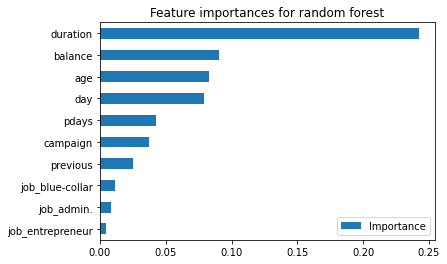

In [55]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_valid.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

In [60]:
#create a new X train with only 10 features

X_train2 = X_train[['duration', 'age', 'balance', 'day', 'pdays', 
        'campaign', 'previous', 'job_entrepreneur', 'job_blue-collar']]

X_train2.head(2)

,duration,age,balance,day,pdays,campaign,previous,job_entrepreneur,job_blue-collar
4039,208,71,353,27,93,1,2,0,0
1825,75,37,781,20,-1,1,0,0,0


In [61]:
X_valid2 = X_valid[['duration', 'age', 'balance', 'day', 'pdays', 
        'campaign', 'previous', 'job_entrepreneur', 'job_blue-collar']]

In [62]:
#train and predict
RF.fit(X_train2,y_train)
pred2 = RF.predict(X_valid2)

print(accuracy_score(pred2,y_valid))

0.8872512896094326


## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

LR - has an accuracy score of 89%, precision of 0.18 and recall of 0.62

KN - has an accuracy score of 88%, precision of 0.19 and recall of 0.45

DT - has an accuracy score of 87%, precision of 0.45 and recall of 0.45

RF - has an accuracy score of 89%, precision of 0.18 and recall of 0.67 - This is the best model




## Summary

What model should be deployed to production?
Any other comments?

 - Our dataset consist of categorical and numerical features. We have 16 independent features, out of these only half of them are important.   

- Accuracies of all models are about 87 - 89%
 
- The high accuracies could be associated with the correlation between the input features. 
 
- The Random Forest model should be deployed for production as it the model having the best accuracy as well as Precision and recall. 
    
    
    